<a href="https://colab.research.google.com/github/Shayankr/Artistic-Style-Transfer-GAN-Dashtoon-Assignment/blob/master/Artistic_Style_Transfer_224102319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Development of an Adaptable Deep Learning Model for Artistic Style Transfer</center>

Neural Style Transfer is a technique that allows us to generate an image with the same "content" as a base image, but with the "style" of our chosen picture.

In [1]:
# Import Necessary Libraries:
from PIL import Image
import requests
from io import BytesIO  # processing image in bytes form from url_link
from IPython.display import display  # to display image in colab ipynb notebook
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Import torch  to use PyTorch based model:
import torch
import torch.optim as optim
from torchvision import transforms, models

## Load VGG-19 Model:

https://www.mdpi.com/agriengineering/agriengineering-04-00056/article_deploy/html/images/agriengineering-04-00056-g002.png

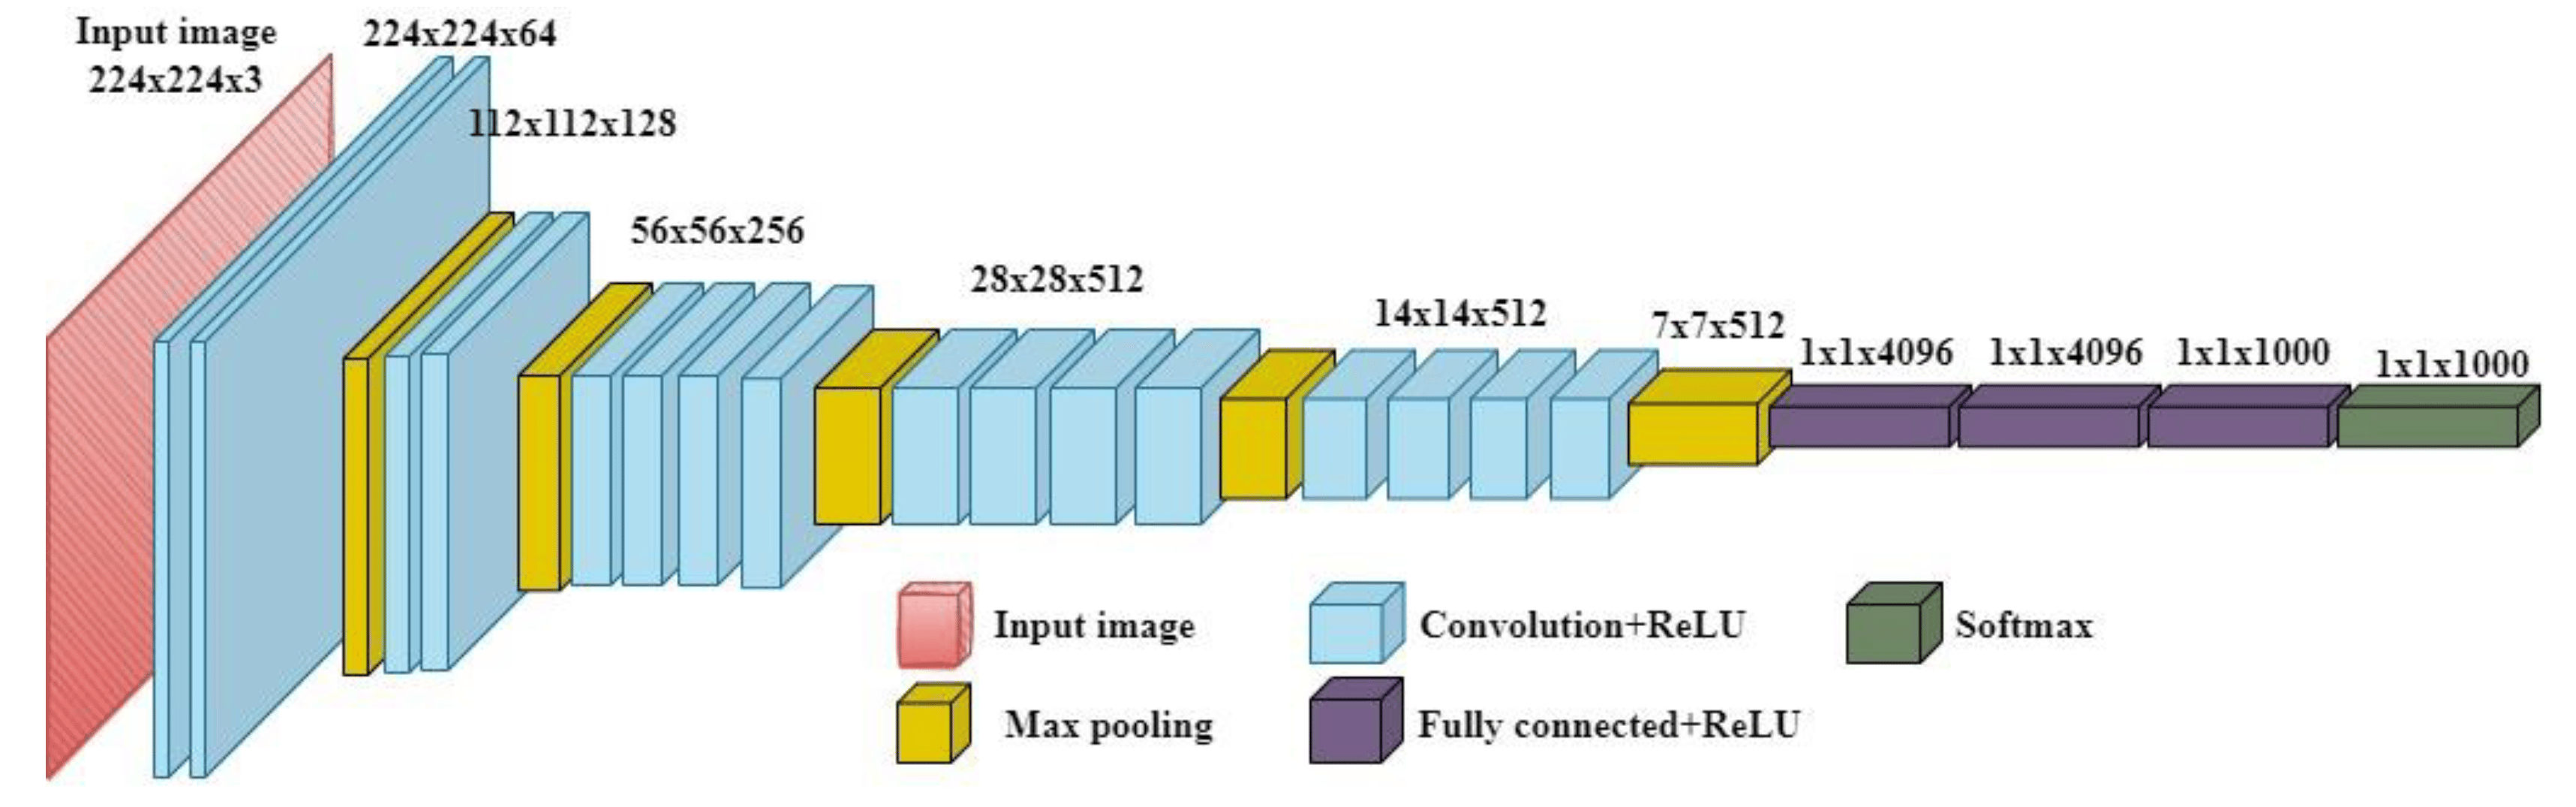

In [95]:
# Load the pre-trained VGG19 model
vgg19 = models.vgg19(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [96]:
# get the "features" portion of VGG19 (we will not need the "classifier" portion)
vgg = vgg19.features

In [97]:
# freeze all VGG parameters since we're only optimizing the target image
for param in vgg.parameters():
    param.requires_grad_(False)

In [98]:
# move the model to GPU, if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Loading Content and Style Image

In [6]:
# define a function to load image with specific criterion:

def load_img(img_path, img_size):
  img = Image.open(img_path).convert('RGB')

  transform = transforms.Compose([transforms.Resize((img_size[1], img_size[0])),
                                  transforms.ToTensor(),
                                  transforms.Normalize(
                                      mean = [0.485, 0.456, 0.406],
                                      std = [0.229, 0.224, 0.225]
                                  )])
  img = transform(img)
  # discard the transparent, alpha channel (that's the :3) and add the batch dimension
  image = img[:3,:,:].unsqueeze(0)
  return img

### Download one content and Style image:

In [ ]:
# Downloading Style Image:

# Image URL
style_image_url = "https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg"
# style_image_url = "https://drive.google.com/drive/u/1/folders/1SXsKH-dp_xLp0F1vBEdRqsd5b5Lq7teu"

# Download the image
response = requests.get(style_image_url)
style_img = Image.open(BytesIO(response.content))

# Display the image in Colab
# display(style_img)

# Save the image
style_img.save("starry_night.jpg")



In [8]:
# Downloading Content Image:

# Image URL
content_image_url = "https://i.ytimg.com/vi/opAReaW7DkU/maxresdefault.jpg"
# content_image_url = "https://drive.google.com/file/d/1W1nL4JRUhqvtqHcN5yLpgOcyygikr-Q0/view?usp=sharing"

# Download the image
response = requests.get(content_image_url)
content_img = Image.open(BytesIO(response.content))

# Display the image in Colab
# display(content_img)

# Save the image
content_img.save("call_of_duty_ghosts.jpg")

### Image Pair - 1:

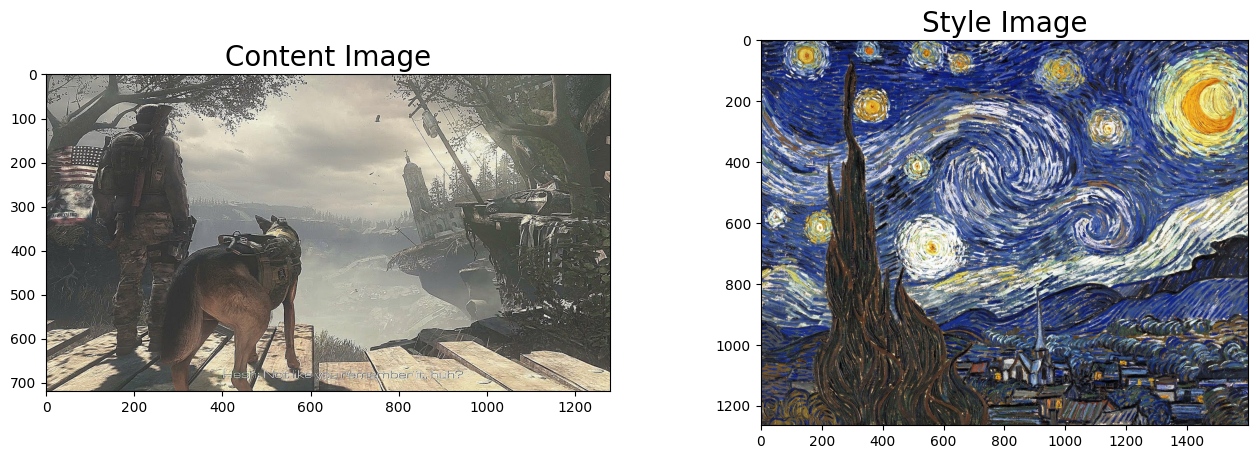

In [9]:
# Display the above loaded images
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Content and style images side-by-side
ax1.imshow(content_img)
ax1.set_title("Content Image", fontsize=20)

ax2.imshow(style_img)
ax2.set_title("Style Image", fontsize=20)

plt.show()

### Image Pair - 2:

In [99]:
content_img = Image.open("/content/woman_face.jpg")
style_img = Image.open("/content/artist_woman_face.jpg")

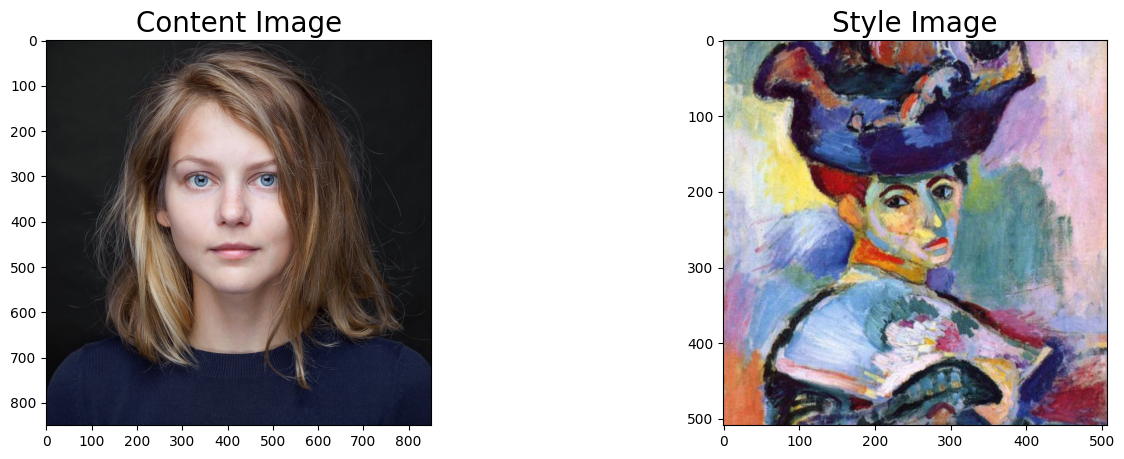

In [100]:
# Display the above loaded images
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Content and style images side-by-side
ax1.imshow(content_img)
ax1.set_title("Content Image", fontsize=20)

ax2.imshow(style_img)
ax2.set_title("Style Image", fontsize=20)

plt.show()

In [101]:
img_size = content_img.size
# (3, 224, 224)

In [102]:
img_size

(850, 850)

In [103]:
# load in content and style image
# content_img = load_img('call_of_duty_ghosts.jpg', img_size = img_size).to(device)
content_img = load_img('woman_face.jpg', img_size = img_size).to(device)

# Resize style to match content, makes code easier
# style_img = load_img('starry_night.jpg', img_size = img_size).to(device)
style_img = load_img('artist_woman_face.jpg', img_size = img_size).to(device)

In [104]:
content_img.shape, style_img.shape

(torch.Size([3, 850, 850]), torch.Size([3, 850, 850]))

In [14]:
# Convert a Tensor image to a NumPy image for display
def to_np_img(tensor_img):
    """ Converting a Tensor Image to NumPy array to display iamge using matplotlib lib. """

    img = tensor_img.to("cpu").clone().detach()
    img = img.numpy().squeeze()
    img = img.transpose(1,2,0)
    img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    img = img.clip(0, 1)

    return img

## Content and Style Features:


Now, mapping the layers for the content representation and the style representation.

In [105]:
# Checking each layer with name and detailed specifications:
for name, layer in vgg._modules.items():
        print(name , " : ", layer)

0  :  Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1  :  ReLU(inplace=True)
2  :  Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
3  :  ReLU(inplace=True)
4  :  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
5  :  Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
6  :  ReLU(inplace=True)
7  :  Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
8  :  ReLU(inplace=True)
9  :  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
10  :  Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
11  :  ReLU(inplace=True)
12  :  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
13  :  ReLU(inplace=True)
14  :  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
15  :  ReLU(inplace=True)
16  :  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
17  :  ReLU(inplace=True)
18  :  MaxPool2d(kernel_size=2, stride=2, pa

In [16]:
# Defining a function to get the features of an image from model with the target_layer:
def get_features(image, model, target_layers=None):
    """Run an image forward through a model and get the features for a set of layers.
    Default layers are for VGGNet matching Gatys et al (2016).
    """
    # Define default layers for VGGNet
    default_layers = {
        '0': 'conv1_1',
        '5': 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',  # Content representation
        '28': 'conv5_1'
    }

    # Use default layers if target_layers is not provided
    layers = target_layers or default_layers

    features = {}
    current_output = image

    # Iterate through each module in the model
    for name, layer in model._modules.items():
        current_output = layer(current_output)
        if name in layers:
            features[layers[name]] = current_output

    return features


## Defining Loss Functions:

### Gram Matrix for a convolution Matrix:

For detail visit: https://en.wikipedia.org/wiki/Gramian_matrix

The Gram matrix, denoted as GG, for a given tensor is a measure of the correlation between different spatial positions of the feature maps produced by a convolutional layer. It is calculated as follows:

1. Get the dimensions of the tensor:

  Extract the depth (number of feature maps), height, and width of the tensor using:
  ```batch_size, depth, height, width = tensor.size()```

2. Reshape the tensor:

  Reshape the tensor so that the spatial dimensions are flattened into a 2D matrix. The reshaped tensor XX would have **dimensions (d,h×w)(d,h×w)**:
  ```reshaped_tensor = tensor.view(depth, height * width)```

3. Calculate the Gram matrix:

  Calculate the Gram matrix GG by multiplying the reshaped tensor by its transpose. The Gram matrix is a square matrix of size d×dd×d:
  ```gram_matrix = torch.mm(reshaped_tensor, reshaped_tensor.t())```


**Putting it all together --**

In [17]:
def gram_matrix(tensor):
    # If the tensor has 3 dimensions, add a batch dimension
    if tensor.dim() == 3:
        tensor = tensor.unsqueeze(0)

    # Get dimensions of the tensor
    batch_size, depth, height, width = tensor.size()

    # Reshape the tensor
    reshaped_tensor = tensor.view(batch_size * depth, height * width)

    # Calculate the Gram matrix
    gram_matrix = torch.mm(reshaped_tensor, reshaped_tensor.t())

    return gram_matrix


## Extracting Features and Computing Gram Matrix:

In [106]:
# get content and style features only onc time ---  before the  training process:
content_features = get_features(content_img, vgg)
style_features = get_features(style_img, vgg)

In [107]:
style_features['conv1_1'].shape

torch.Size([64, 850, 850])

In [108]:
# Calculate the Gram matrices for each layer of the style representation
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}


In [109]:
# Create a third "target" image and prepare it for modification
# Initialize the target as a copy of the *content* image
# Then iteratively adjust its style during the optimization process
target_image = content_img.clone().requires_grad_(True).to(device)

In [110]:
style_grams['conv1_1'].sum()

tensor(3.2037e+08, device='cuda:0')

## Loss and Weights:

1. Individual Layer Style Weights:
2. Content and Style Weight:

    Define an `alpha (content_weight)` and a `beta (style_weight)`.

    This ratio will affect how stylized will be the final image.

    It's recommended that ---  leave the `content_weight = 1` and `set the style_weight` to achieve the ratio you want.

In [128]:
# Define weights for each style layer
# Giving more weight to earlier layers results in larger style artifacts
# We exclude `conv4_2` from our content representation
style_layer_weights = {'conv1_1': 1.0,
                       'conv2_1': 0.75,
                       'conv3_1': 0.2,
                       'conv4_1': 0.2,
                       'conv5_1': 0.2}

content_weight = 7e-6  # Alpha
style_weight = 6e-9  # Beta


## Updating the Target Image based on Losses:

`Set the number of steps to iterate throgh the target image -- training:`

`Update the target image based on content and style losses:`

#### Content Loss:

The content loss will be the mean squared difference between the target and content features at layer conv4_2.

In [129]:
target_features = get_features(target_image, vgg)

In [131]:
# target_features

In [132]:
# Define the function for content loss
content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)

In [133]:
content_loss

tensor(4.7634, device='cuda:0', grad_fn=<MeanBackward0>)

#### Style Loss:

The style loss is calculated in a similar way:

Only need to iterate through a number of layers, specified by name in our dictionary style_weights

- Compute the Gram matrix for the target image (target_gram) and the style image (style_gram) at each of these layers.

- Subsequently, Compare these Gram matrices, resulting in the calculation of the layer_style_loss.

- It will be evident later that this value is normalized by the size of the layer.

### Total Loss:

#### Combination-2:

Finally,
Creating the total loss by adding up the style and content losses and weighting them with the specified alpha and beta!

In [135]:
# For displaying the target image intermittently
display_interval = 400

# Iteration hyperparameters
optimizer = optim.Adam([target_image], lr=0.003)
total_iterations = 2000

for iteration in range(1, total_iterations + 1):

    # Get the features from your target image
    target_features = get_features(target_image, vgg)

    # Calculate the content loss
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)

    # Initialize the style loss to 0
    style_loss = 0

    # Add to it for each layer's Gram matrix loss
    for layer in style_layer_weights:
        # Get the "target" style representation for the layer
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        d, h, w = target_feature.shape

        # Get the "style" style representation
        style_gram = style_grams[layer]

        # The style loss for one layer, weighted appropriately
        layer_style_loss = style_layer_weights[layer] * torch.mean((target_gram - style_gram)**2)

        # Add to the style loss
        style_loss += layer_style_loss / (d * h * w)

    # Calculate the total loss
    total_loss = content_weight * content_loss + style_weight * style_loss

    # Update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Display intermediate images and print the loss
    if iteration % display_interval == 0:
        print('Total loss:', total_loss.item())
        plt.figure(figsize=(16, 4))
        plt.imshow(to_np_img(target_image))
        plt.show()
#

#### Combination -1:

Total loss: 143031779328.0


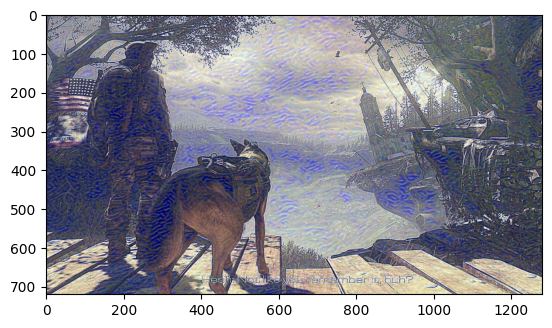

Total loss: 23998574592.0


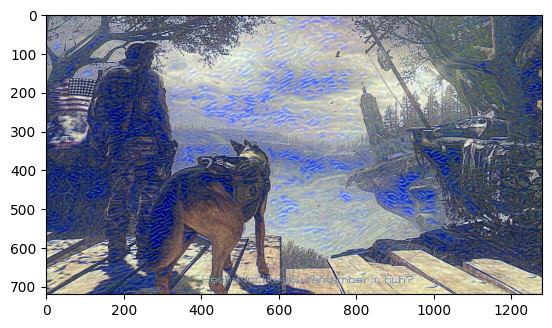

Total loss: 11797131264.0


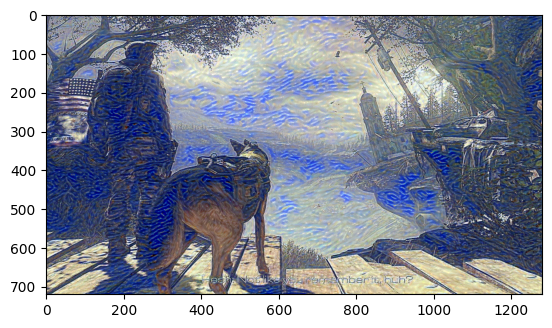

Total loss: 7551003136.0


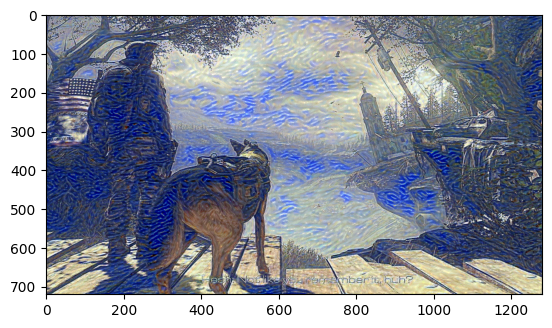

Total loss: 5397866496.0


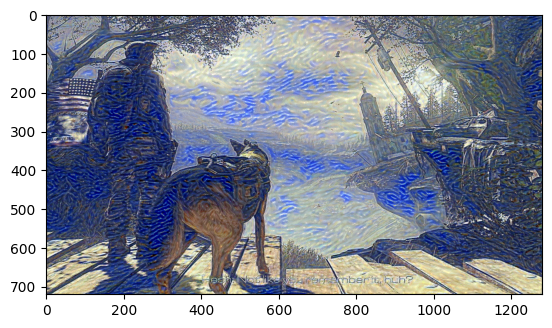

Total loss: 4089552896.0


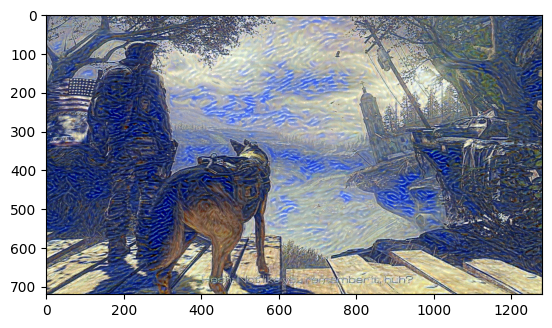

Total loss: 3193572096.0


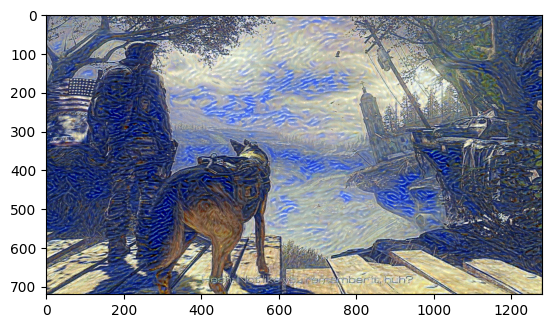

Total loss: 2528060160.0


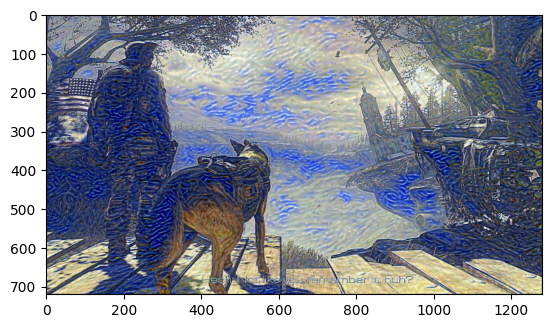

Total loss: 2008560640.0


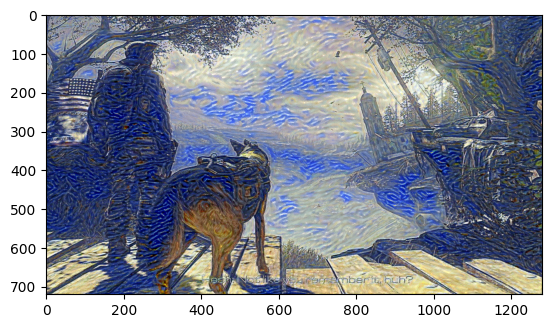

Total loss: 1594438016.0


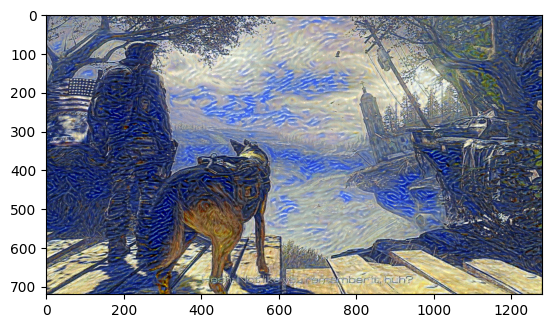

In [27]:
# For displaying the target image intermittently
display_interval = 400

# Iteration hyperparameters
optimizer = optim.Adam([target_image], lr=0.003)
total_iterations = 4000

for iteration in range(1, total_iterations + 1):

    # Get the features from your target image
    target_features = get_features(target_image, vgg)

    # Calculate the content loss
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)

    # Initialize the style loss to 0
    style_loss = 0

    # Add to it for each layer's Gram matrix loss
    for layer in style_layer_weights:
        # Get the "target" style representation for the layer
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        d, h, w = target_feature.shape

        # Get the "style" style representation
        style_gram = style_grams[layer]

        # The style loss for one layer, weighted appropriately
        layer_style_loss = style_layer_weights[layer] * torch.mean((target_gram - style_gram)**2)

        # Add to the style loss
        style_loss += layer_style_loss / (d * h * w)

    # Calculate the total loss
    total_loss = content_weight * content_loss + style_weight * style_loss

    # Update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # Display intermediate images and print the loss
    if iteration % display_interval == 0:
        print('Total loss:', total_loss.item())
        plt.figure(figsize=(16, 4))
        plt.imshow(to_np_img(target_image))
        plt.show()


## Displaying the Content Image with Target Image:

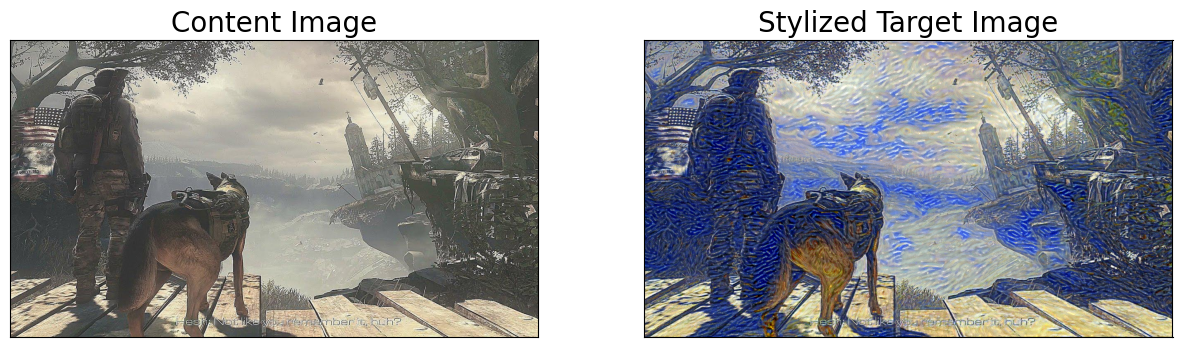

In [28]:
# Display content and final stylized target image in one row with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# Display content image
ax1.imshow(to_np_img(content_img))
ax1.set_title("Content Image", fontsize=20)
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

# Display stylized target image
ax2.imshow(to_np_img(target_image))
ax2.set_title("Stylized Target Image", fontsize=20)
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()


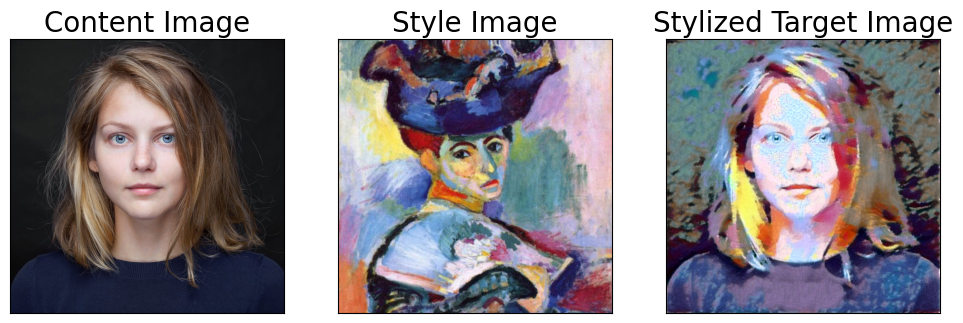

In [127]:
# Display content and final stylized target image in one row with two columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 7.5))

# Display content image
ax1.imshow(to_np_img(content_img))
ax1.set_title("Content Image", fontsize=20)
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

# Display Style image
ax2.imshow(to_np_img(style_img))
ax2.set_title("Style Image", fontsize=20)
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

# Display stylized target image
ax3.imshow(to_np_img(target_image))
ax3.set_title("Stylized Target Image", fontsize=20)
ax3.grid(False)
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()


Above , we can clearly confirm that, we are able to transfer the style of Style-Image to the Actual Content-Image.

We can increase the content of stylish by keeping the actual content in more better way by tunning some hyper-parametera and by running the training for more number of iterations.

In [ ]:
#END